In [75]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [76]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
    
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [77]:
model = model_fn()
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 100)               78500     
                                                                 
 dense_57 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [79]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


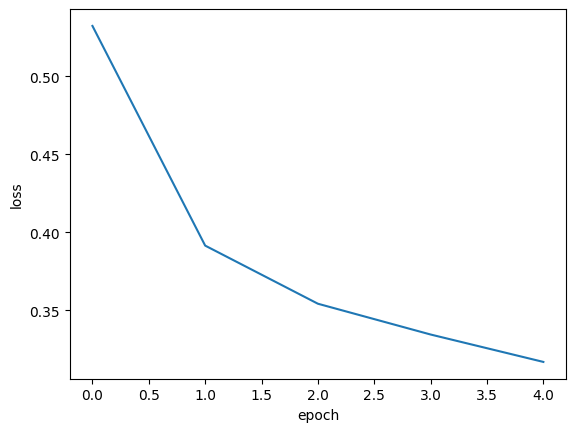

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

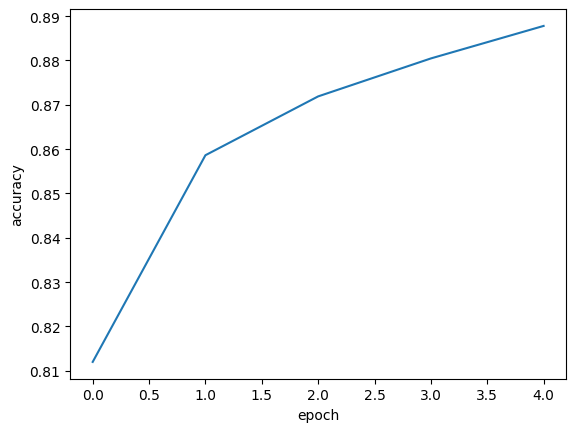

In [81]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

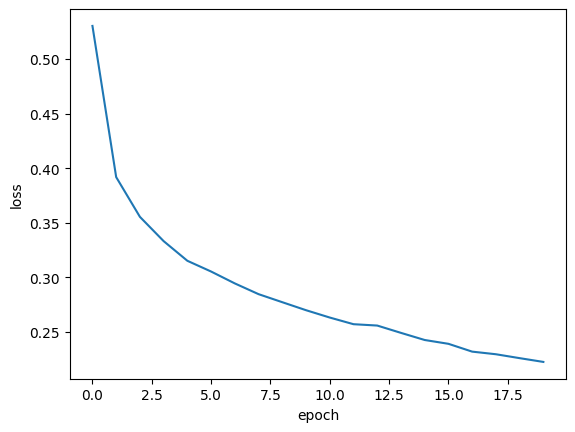

In [82]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [83]:
# RMSProp 옵티마이저 사용
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [84]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


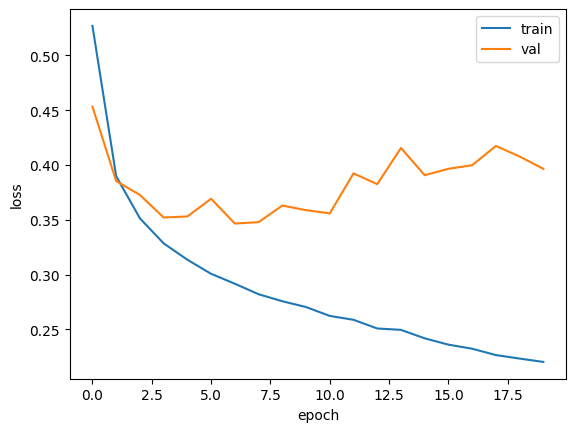

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

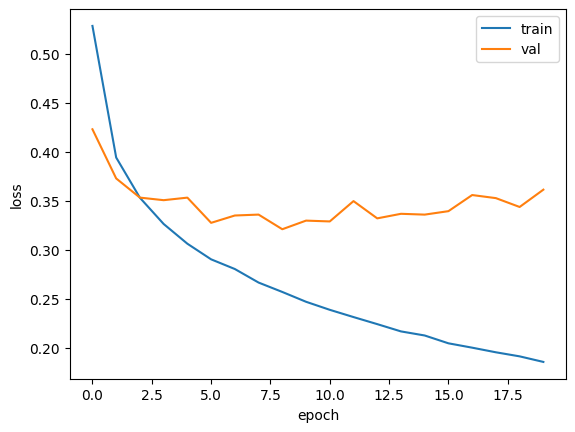

In [86]:
# adam 옵티마이저 사용
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [87]:
# dropout
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_32 (Flatten)        (None, 784)               0         
                                                                 
 dense_64 (Dense)            (None, 100)               78500     
                                                                 
 dropout_12 (Dropout)        (None, 100)               0         
                                                                 
 dense_65 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


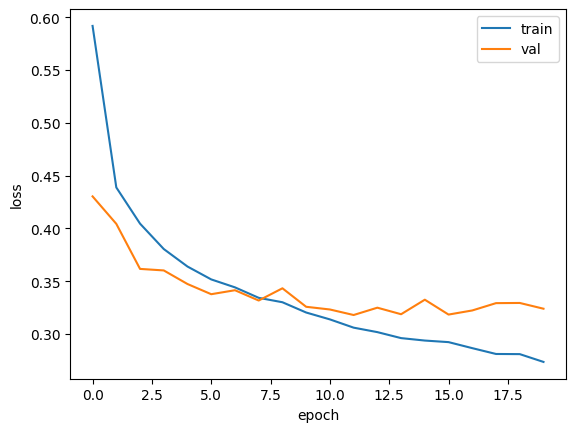

In [88]:
# adam 옵티마이저 사용, dropout 사용
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [89]:
# 모델 저장과 복원
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [90]:
model.save_weights('model-weights.h5')

In [91]:
model.save('model-whole.h5')

In [92]:
ls -al *.h5

 D 드라이브의 볼륨: Data
 볼륨 일련 번호: E81A-C284

 D:\Github\Machine_Learning_TIL 디렉터리


 D:\Github\Machine_Learning_TIL 디렉터리

2023-08-17  오후 12:22           981,176 best-model.h5
2023-08-17  오후 12:34           332,584 model-weights.h5
2023-08-17  오후 12:34           980,368 model-whole.h5
               3개 파일           2,294,128 바이트
               0개 디렉터리  104,080,736,256 바이트 남음


In [93]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [94]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8851666666666667


In [95]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8852


[0.3188082277774811, 0.8851666450500488]

In [96]:
# callback
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                               save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
           validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb])

In [97]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.8892


[0.313312292098999, 0.8892499804496765]

In [105]:
# callback + early stopping
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                               save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history_es = model.fit(train_scaled, train_target, epochs=20, verbose=0,
           validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopping_cb])

In [106]:
print(early_stopping_cb.stopped_epoch)

12


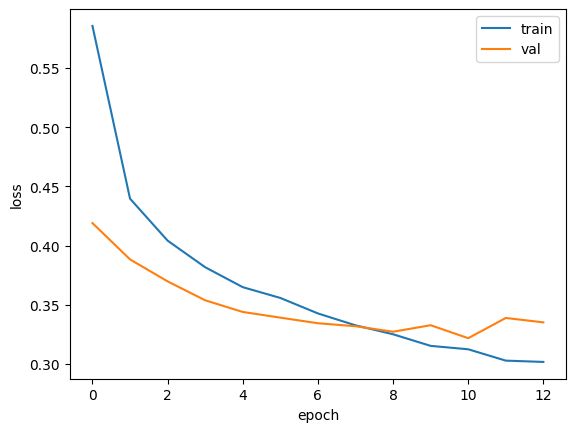

In [107]:
plt.plot(history_es.history['loss'])
plt.plot(history_es.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [108]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 0.8844


[0.32172995805740356, 0.8844166398048401]